In [50]:
# Install scikit-learn in a Jupyter Notebook
# !pip install scikit-learn
# !pip install matplotlib
# !pip install plotly
# !pip install nbformat>=4.2


In [51]:
import pandas as pd
#give me a k means code for clustering 
from sklearn.cluster import KMeans
import numpy as np

In [52]:
df=pd.read_csv("fb_data.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [53]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4','status_id','status_published'], axis=1, inplace=True)

In [54]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0
7046,photo,16,0,0,14,1,0,1,0,0
7047,photo,2,0,0,1,1,0,0,0,0
7048,photo,351,12,22,349,2,0,0,0,0


In [55]:
#encode categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status_type']= le.fit_transform(df['status_type'])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
df[cols] = minmaxscaler.fit_transform(df[cols])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,3,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,1,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,1,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [57]:
df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,3,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,1,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,1,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
7045,1,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
7046,1,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
7047,1,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
7048,1,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


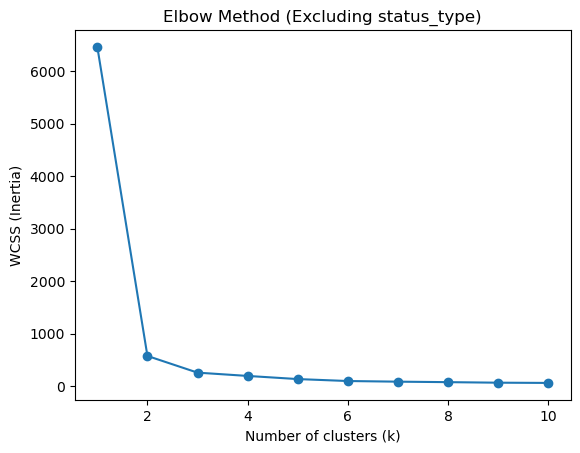

Accuracy: 0.9635460992907802
Confusion Matrix:
 [[  14   49    0    0]
 [ 208 4080    0    0]
 [   0    0  365    0]
 [   0    0    0 2334]]


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment


# X = df.drop(columns=['status_type'])
x = df
y_true = df['status_type']

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Excluding status_type)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.show()

# Run KMeans with fixed k=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x)

# Hungarian algorithm for best matching
conf_matrix = confusion_matrix(y_true, y_pred)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
mapping = {col: row for row, col in zip(row_ind, col_ind)}
y_mapped = np.array([mapping[label] for label in y_pred])

print("Accuracy:", accuracy_score(y_true, y_mapped))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_mapped))




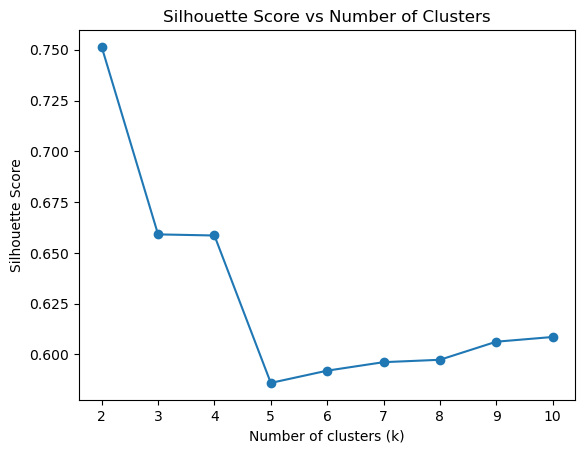

[np.float64(0.7513992386372905), np.float64(0.659065644649237), np.float64(0.658516345024123), np.float64(0.5859039441932523), np.float64(0.5919419164881341), np.float64(0.5961244041993263), np.float64(0.5972992073176533), np.float64(0.6062042453214641), np.float64(0.6085266374243721)]


In [59]:
# find sihlouette score
from sklearn.metrics import silhouette_score
# kmeans = KMeans(n_clusters=3, random_state=42)
# y_kmeans = kmeans.fit_predict(X)
# score = silhouette_score(X, y_kmeans)
# print(f'Silhouette Score for k=3: {score}')
 
# plot silhouette score on elbow method

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_s=sc.fit_transform(x)

import matplotlib.pyplot as plt
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42)
    kmeans.fit(x_s)
    score = silhouette_score(x_s, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()
print(silhouette_scores)
 